In [1]:
#%matplotlib notebook
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
data = pd.read_csv('Indoor_21-4-2016 30MIN.csv', 
                   skiprows=3,       # ignore the first 3 rows of data
                   sep=';',          # semicolon is used to separate data values
                   index_col=1,      # use column 1 as the dates to index the data
                   parse_dates=True) # convert the date string into a date object
data[-5:]

,Timestamp,Temperature,Humidity,CO2,Noise,Pressure
Timezone : America/Los_Angeles,,,,,,
2016-04-20 22:01:00,1461214860,22.8,57,399,35,1009.2
2016-04-20 22:31:00,1461216660,22.8,57,393,35,1009.2
2016-04-20 23:01:00,1461218460,22.8,57,392,35,1009.2
2016-04-20 23:31:00,1461220260,22.7,57,391,35,1009.1
2016-04-21 00:01:00,1461222060,22.7,57,384,35,1009.0


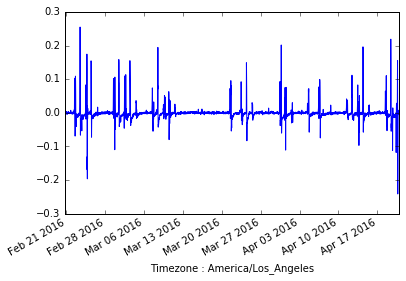

In [2]:
inside_concentration = data['CO2']
concentration_slope = data['CO2'].diff()/data['Timestamp'].diff()
concentration_slope.plot()

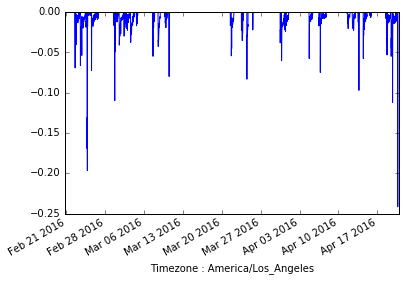

In [3]:
concentration_slope = concentration_slope.where(concentration_slope<0, 0)
concentration_slope = concentration_slope.where(data['CO2']>450, 0)
concentration_slope.plot()

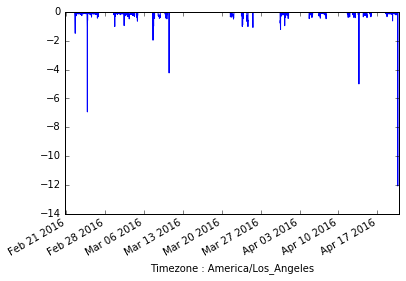

In [4]:
infiltration_rate = concentration_slope/((inside_concentration - 400.).abs())*3600
infiltration_rate.plot()

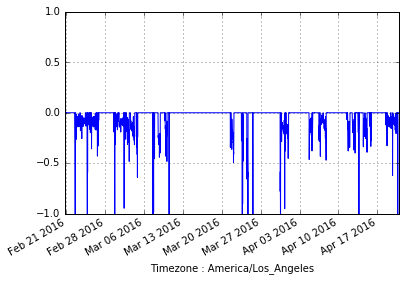

In [5]:
ax = infiltration_rate.plot()
ax.set_ylim((-1,1))
ax.grid()
plt.savefig('test.pdf')

In [6]:
infiltration_rate.describe()

count    2888.000000
mean       -0.055188
std         0.308958
min       -12.083333
25%        -0.036691
50%         0.000000
75%         0.000000
max         0.000000
dtype: float64

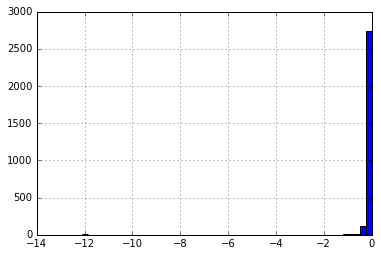

In [7]:
infiltration_rate.hist(bins=50)

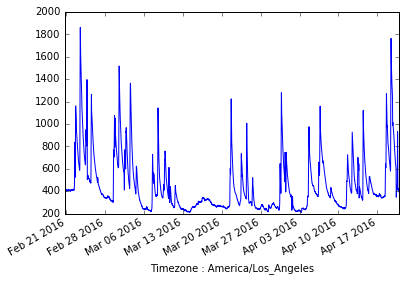

In [8]:
data['CO2'].plot()

In [9]:
time2 = '2016-04-19 12:18:29'
time1 = '2016-04-19 12:43:36'

data[time2:time1]

,Timestamp,Temperature,Humidity,CO2,Noise,Pressure
Timezone : America/Los_Angeles,,,,,,
2016-04-19 12:31:00,1461094260,23.1,57,1665,36,1009.5


In [10]:
time2 = '2016-04-19 12:18:29'
time1 = '2016-04-19 12:43:36'
rise = data['CO2'][time2] - data['CO2'][time1]
run = (data['Timestamp'][time2] - data['Timestamp'][time1])


print(data['CO2'][time2])
print(rise)
print('run =',run)
print('slope =', rise/run)
rise / run * 3600 / (data['CO2'][time2]-400)

KeyError: '2016-04-19 12:18:29'